Question: In this assignment you will use the Telco Churn dataset provided to predict which customer will churn.
You will **exclude** the following features in determining churn (keeping it simple): “**X_dataobs**” , “**State**”;
“**Area Code**” & “**Phone**”

There are **some categorical variables** that needs to be converted into dummy variable for the analysis (
“**Int_l_Plan**”; “**Vmail_Plan**” and “**Churn**”). You will use the “One-hot encoded" to accomplish this (see
A5 ~ predicting used Toyota Corolla).
You will use 80% of the data to train the learner on “Churn”
Create a table to present the metric i.e. accuracy, recall, precision and F1 score (see HR tutorial)

In [1]:
#import modules
import pandas  # for dataframes manipulations
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np
#MODEL
from imblearn.over_sampling import SMOTE # will not use this yet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
# create pandas dataframe
telco = pandas.read_csv('/content/drive/MyDrive/newtelco.csv')
telco.head()

X_dataobs_ State  Account_Length  Area_Code     Phone Int_l_Plan  \
0           1    KS             128        415  382-4657         no   
1           2    OH             107        415  371-7191         no   
2           3    NJ             137        415  358-1921         no   
3           4    OH              84        408  375-9999        yes   
4           5    OK              75        415  330-6626        yes   

  VMail_Plan  VMail_Message  Day_Mins  Day_Calls  ...  Eve_Calls  Eve_Charge  \
0        yes             25     265.1        110  ...         99       16.78   
1        yes             26     161.6        123  ...        103       16.62   
2         no              0     243.4        114  ...        110       10.30   
3         no              0     299.4         71  ...         88        5.26   
4         no              0     166.7        113  ...        122       12.61   

   Night_Mins  Night_Calls  Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ_Calls  Churn_  
0               1   False  
1               1   False  
2               0   False  
3               2   False  
4               3   False  

[5 rows x 22 columns]

In [68]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4667 entries, 0 to 4666
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X_dataobs_      4667 non-null   int64  
 1   State           4667 non-null   object 
 2   Account_Length  4667 non-null   int64  
 3   Area_Code       4667 non-null   int64  
 4   Phone           4667 non-null   object 
 5   Int_l_Plan      4667 non-null   object 
 6   VMail_Plan      4667 non-null   object 
 7   VMail_Message   4667 non-null   int64  
 8   Day_Mins        4667 non-null   float64
 9   Day_Calls       4667 non-null   int64  
 10  Day_Charge      4667 non-null   float64
 11  Eve_Mins        4667 non-null   float64
 12  Eve_Calls       4667 non-null   int64  
 13  Eve_Charge      4667 non-null   float64
 14  Night_Mins      4667 non-null   float64
 15  Night_Calls     4667 non-null   int64  
 16  Night_Charge    4667 non-null   float64
 17  Intl_Mins       4667 non-null   f

In [69]:
#count null values in dataset
telco.isnull().sum()

X_dataobs_        0
State             0
Account_Length    0
Area_Code         0
Phone             0
Int_l_Plan        0
VMail_Plan        0
VMail_Message     0
Day_Mins          0
Day_Calls         0
Day_Charge        0
Eve_Mins          0
Eve_Calls         0
Eve_Charge        0
Night_Mins        0
Night_Calls       0
Night_Charge      0
Intl_Mins         0
Intl_Calls        0
Intl_Charge       0
CustServ_Calls    0
Churn_            0
dtype: int64

In [70]:
print(telco.columns)

Index(['X_dataobs_', 'State', 'Account_Length', 'Area_Code', 'Phone',
       'Int_l_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn_'],
      dtype='object')


In [71]:
# Drop the features you want to exclude
features_to_exclude = ["X_dataobs_", "State", "Area_Code", "Phone"]
telco = telco.drop(features_to_exclude, axis=1)

In [72]:
print(telco.columns)

Index(['Account_Length', 'Int_l_Plan', 'VMail_Plan', 'VMail_Message',
       'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
       'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins',
       'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn_'],
      dtype='object')


In [73]:
print(telco['Churn_'].unique())

[False  True]


In [74]:
print(telco['Churn_'].value_counts())

False    4016
True      651
Name: Churn_, dtype: int64


In [75]:
telco.Churn_.unique()

array([False,  True])

In [76]:
print(telco['Int_l_Plan'].unique())

['no' 'yes']


In [77]:
print(telco['Int_l_Plan'].value_counts())

no     4224
yes     443
Name: Int_l_Plan, dtype: int64


In [78]:
telco.Int_l_Plan.unique()

array(['no', 'yes'], dtype=object)

In [79]:
print(telco['VMail_Plan'].unique())


['yes' 'no']


In [80]:
print(telco['VMail_Plan'].value_counts())

no     3432
yes    1235
Name: VMail_Plan, dtype: int64


In [81]:
telco.describe()

Account_Length  VMail_Message     Day_Mins    Day_Calls   Day_Charge  \
count     4667.000000    4667.000000  4667.000000  4667.000000  4667.000000   
mean       100.141204       7.758517   180.345340   100.040711    30.659271   
std         39.635858      13.560131    53.713412    19.874662     9.131238   
min          1.000000       0.000000     0.000000     0.000000     0.000000   
25%         73.000000       0.000000   143.900000    87.000000    24.460000   
50%        100.000000       0.000000   180.100000   100.000000    30.620000   
75%        127.000000      17.000000   216.350000   113.000000    36.780000   
max        243.000000      52.000000   351.500000   165.000000    59.760000   

          Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  Night_Calls  \
count  4667.000000  4667.000000  4667.000000  4667.000000  4667.000000   
mean    200.596572   100.245125    17.050928   200.216220    99.768802   
std      50.426374    19.847531     4.286216    50.420064    19.845425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     166.700000    87.000000    14.170000   166.650000    87.000000   
50%     200.600000   100.000000    17.050000   199.800000   100.000000   
75%     233.750000   114.000000    19.865000   233.900000   113.000000   
max     363.700000   170.000000    30.910000   395.000000   170.000000   

       Night_Charge    Intl_Mins   Intl_Calls  Intl_Charge  CustServ_Calls  
count   4667.000000  4667.000000  4667.000000  4667.000000     4667.000000  
mean       9.009844    10.260274     4.433255     2.770793        1.569745  
std        2.268927     2.745950     2.447650     0.741353        1.304321  
min        0.000000     0.000000     0.000000     0.000000        0.000000  
25%        7.500000     8.500000     3.000000     2.300000        1.000000  
50%        8.990000    10.300000     4.000000     2.780000        1.000000  
75%       10.525000    12.000000     6.000000     3.240000        2.000000  
max       17.770000    20.000000    20.000000     5.400000        9.000000

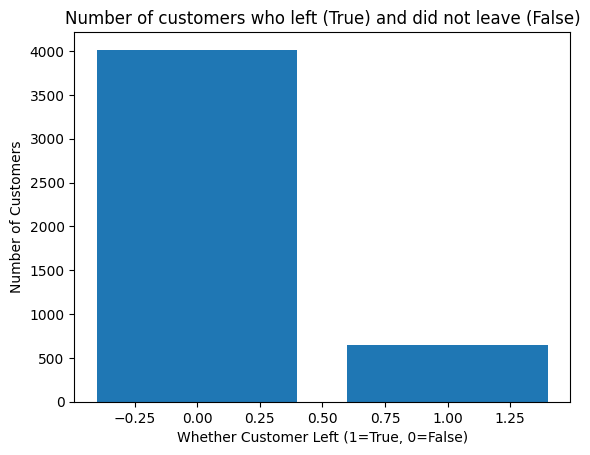

In [84]:
#Data Visualization
# use'Churn_' column
churn_column_count = telco['Churn_'].value_counts()

# Plotting the bar chart
plt.bar(churn_column_count.index, churn_column_count)
plt.title('Number of customers who left (True) and did not leave (False)')
plt.xlabel('Whether Customer Left (1=True, 0=False)')
plt.ylabel('Number of Customers')
plt.show()

In [123]:
print('\n', telco.Int_l_Plan.value_counts())
print('\n', telco.VMail_Plan.value_counts())
print('\n', telco.Churn_.value_counts())


 no     4224
yes     443
Name: Int_l_Plan, dtype: int64

 no     3432
yes    1235
Name: VMail_Plan, dtype: int64

 False    4016
True      651
Name: Churn_, dtype: int64


In [125]:
telco.Intl_Plan = telco.Int_l_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', telco.Intl_Plan.value_counts())

telco.VMail_Plan = telco.VMail_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', telco.VMail_Plan.value_counts())

telco.Churn = telco.Churn_.apply( lambda x: 1.0 * (x=='True.') )
print('\n', telco.Churn.value_counts())


 0.0    4224
1.0     443
Name: Int_l_Plan, dtype: int64

 0.0    3432
1.0    1235
Name: VMail_Plan, dtype: int64

 0.0    4667
Name: Churn_, dtype: int64


<ipython-input-125-2f7162c8ab03>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  telco.Churn = telco.Churn_.apply( lambda x: 1.0 * (x=='True.') )


<ipython-input-135-7a4c414f5edd>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="variable", y="Churn_", hue='value', data=telcotest, height=8, aspect=2, kind="bar", palette="husl", ci=None)


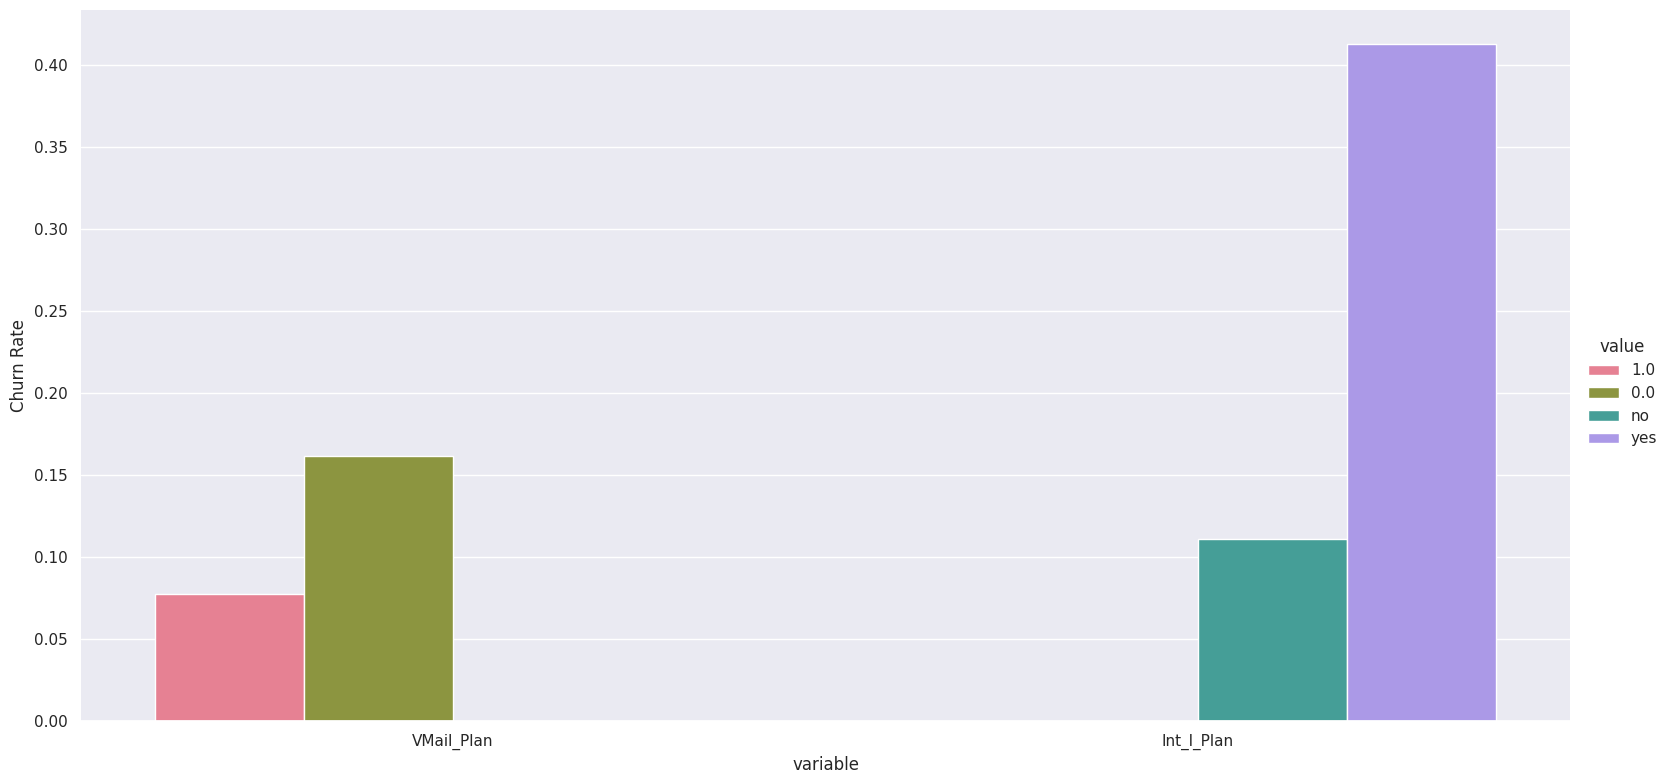

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

telco = pd.DataFrame(telco)

# Create a new temporary dataframe to help us plot these variables.
telcotest = pd.melt(telco, id_vars=['Churn_'], value_vars=["VMail_Plan", "Int_l_Plan"], var_name='variable')

# Create a catplot
g = sns.catplot(x="variable", y="Churn_", hue='value', data=telcotest, height=8, aspect=2, kind="bar", palette="husl", ci=None)
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()



In [24]:
# Convert 'Churn_' column to int64
#telco['Churn_'] = telco['Churn_'].astype(int)

# Check the data type of the 'Churn_' column after conversion
#print(telco['Churn_'].dtype)

int64


In [53]:
import pandas as pd
categorical_columns = ["Int_l_Plan", "VMail_Plan", "Churn_"]

# Convert categorical variables to dummy variables without dropping the first category
telco = pd.get_dummies(telco, columns=categorical_columns)

# Display the modified DataFrame
print(telco.head())

   Account_Length  VMail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   
3              84              0     299.4         71       50.90      61.9   
4              75              0     166.7        113       28.34     148.3   

   Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  ...  Intl_Mins  Intl_Calls  \
0         99       16.78       244.7           91  ...       10.0           3   
1        103       16.62       254.4          103  ...       13.7           3   
2        110       10.30       162.6          104  ...       12.2           5   
3         88        5.26       196.9           89  ...        6.6           7   
4        122       12.61       186.9          121  ...       10.1           3   

   Intl_Charge  CustServ_Calls  Int_l_

In [54]:
telco.describe()

Account_Length  VMail_Message     Day_Mins    Day_Calls   Day_Charge  \
count     4667.000000    4667.000000  4667.000000  4667.000000  4667.000000   
mean       100.141204       7.758517   180.345340   100.040711    30.659271   
std         39.635858      13.560131    53.713412    19.874662     9.131238   
min          1.000000       0.000000     0.000000     0.000000     0.000000   
25%         73.000000       0.000000   143.900000    87.000000    24.460000   
50%        100.000000       0.000000   180.100000   100.000000    30.620000   
75%        127.000000      17.000000   216.350000   113.000000    36.780000   
max        243.000000      52.000000   351.500000   165.000000    59.760000   

          Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  Night_Calls  ...  \
count  4667.000000  4667.000000  4667.000000  4667.000000  4667.000000  ...   
mean    200.596572   100.245125    17.050928   200.216220    99.768802  ...   
std      50.426374    19.847531     4.286216    50.420064    19.845425  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     166.700000    87.000000    14.170000   166.650000    87.000000  ...   
50%     200.600000   100.000000    17.050000   199.800000   100.000000  ...   
75%     233.750000   114.000000    19.865000   233.900000   113.000000  ...   
max     363.700000   170.000000    30.910000   395.000000   170.000000  ...   

         Intl_Mins   Intl_Calls  Intl_Charge  CustServ_Calls  Int_l_Plan_no  \
count  4667.000000  4667.000000  4667.000000     4667.000000    4667.000000   
mean     10.260274     4.433255     2.770793        1.569745       0.905078   
std       2.745950     2.447650     0.741353        1.304321       0.293138   
min       0.000000     0.000000     0.000000        0.000000       0.000000   
25%       8.500000     3.000000     2.300000        1.000000       1.000000   
50%      10.300000     4.000000     2.780000        1.000000       1.000000   
75%      12.000000     6.000000     3.240000        2.000000       1.000000   
max      20.000000    20.000000     5.400000        9.000000       1.000000   

       Int_l_Plan_yes  VMail_Plan_no  VMail_Plan_yes  Churn__False  \
count     4667.000000    4667.000000     4667.000000   4667.000000   
mean         0.094922       0.735376        0.264624      0.860510   
std          0.293138       0.441180        0.441180      0.346494   
min          0.000000       0.000000        0.000000      0.000000   
25%          0.000000       0.000000        0.000000      1.000000   
50%          0.000000       1.000000        0.000000      1.000000   
75%          0.000000       1.000000        1.000000      1.000000   
max          1.000000       1.000000        1.000000      1.000000   

       Churn__True  
count  4667.000000  
mean      0.139490  
std       0.346494  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

In [55]:
print(telco.columns)

Index(['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Int_l_Plan_no', 'Int_l_Plan_yes', 'VMail_Plan_no',
       'VMail_Plan_yes', 'Churn__False', 'Churn__True'],
      dtype='object')


In [56]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = telco.drop('Churn__True', axis=1)   ## X contains the features (independent variables), excluding the target variable 'Churn__True'
y = telco['Churn__True'] # # y represents the target variable (dependent variable), taking values from the 'Churn__True' column

# Perform the train-test split
# Splitting the data into training and testing sets for model evaluation
# X_train and y_train represent the features and target variable for training, while X_test and y_test for testing
# test_size=0.2 specifies that 20% of the data will be used for testing, and the remaining 80% for training
# random_state=42 ensures reproducibility by fixing the random seed for the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
#Train a machine learning model, regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
#Make predictions on the test set
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9925
Precision: 0.9769
Recall: 0.9695
F1 Score: 0.9732

Confusion Matrix:
[[800   3]
 [  4 127]]


1. Accuracy: 99.25%, high overall correctness.
2. Precision: 97.69%, accurate positive predictions.
3. Recall: 96.95%, correctly identified positive instances.
4. F1 Score: 97.32%, balanced precision and recall.

Confusion Matrix: 800 true negatives, 127 true positives, 3 false positives, 4 false negatives. Model effectively distinguishes both positive and negative instances.

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Account_Length', 'Int_l_Plan', 'VMail_Plan', 'VMail_Message',
            'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
            'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
            'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn_']

# Subplots using Seaborn library to plot all the graphs in a single cell.
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=1.0)

for i, feature in enumerate(features):
    sns.countplot(x=feature, data=telco, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title("No. of customers")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

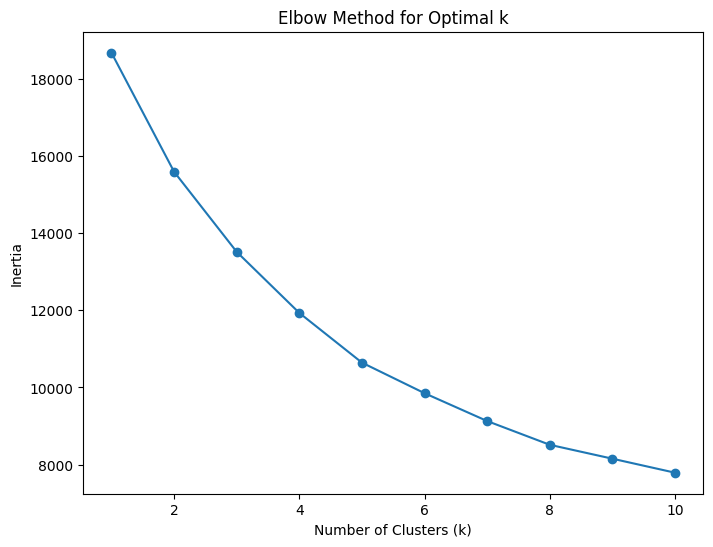

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select relevant features for clustering
features_for_clustering = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']

# Subsetting the data for clustering
data_for_clustering = telco[features_for_clustering]

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters (K) using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal K (e.g., from the plot)
optimal_k = 3

# Apply KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to your original DataFrame
telco['Cluster'] = clusters

# Analyze and visualize the clusters
# For example, you can use scatter plots or other visualizations to explore cluster characteristics


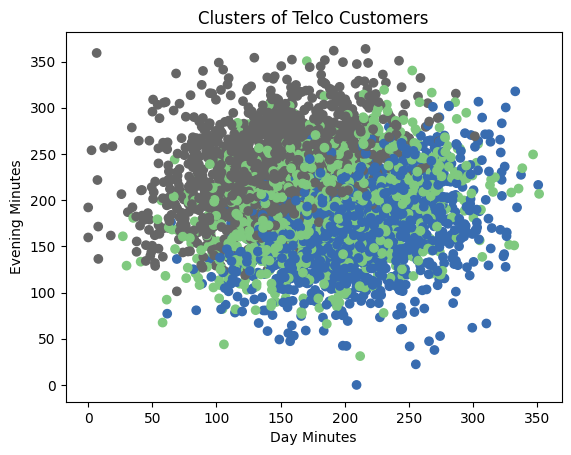

In [92]:
telco['label'] = clusters

# Draw scatter plot
plt.scatter(telco['Day_Mins'], telco['Eve_Mins'], c=telco['label'], cmap='Accent')
plt.xlabel('Day Minutes')
plt.ylabel('Evening Minutes')
plt.title('Clusters of Telco Customers')
plt.show()


In [93]:
X

Account_Length  VMail_Message  Day_Mins  Day_Calls  Day_Charge  \
0                128             25     265.1        110       45.07   
1                107             26     161.6        123       27.47   
2                137              0     243.4        114       41.38   
3                 84              0     299.4         71       50.90   
4                 75              0     166.7        113       28.34   
...              ...            ...       ...        ...         ...   
4662              50             40     235.7        127       40.07   
4663             152              0     184.2         90       31.31   
4664              61              0     140.6         89       23.90   
4665             109              0     188.8         67       32.10   
4666              86             34     129.4        102       22.00   

      Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0        197.4         99       16.78       244.7           91         11.01   
1        195.5        103       16.62       254.4          103         11.45   
2        121.2        110       10.30       162.6          104          7.32   
3         61.9         88        5.26       196.9           89          8.86   
4        148.3        122       12.61       186.9          121          8.41   
...        ...        ...         ...         ...          ...           ...   
4662     223.0        126       18.96       297.5          116         13.39   
4663     256.8         73       21.83       213.6          113          9.61   
4664     172.8        128       14.69       212.4           97          9.56   
4665     171.7         92       14.59       224.4           89         10.10   
4666     267.1        104       22.70       154.8          100          6.97   

      Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Int_l_Plan_no  \
0          10.0           3         2.70               1              1   
1          13.7           3         3.70               1              1   
2          12.2           5         3.29               0              1   
3           6.6           7         1.78               2              0   
4          10.1           3         2.73               3              0   
...         ...         ...          ...             ...            ...   
4662        9.9           5         2.67               2              1   
4663       14.7           2         3.97               3              1   
4664       13.6           4         3.67               1              1   
4665        8.5           6         2.30               0              1   
4666        9.3          16         2.51               0              1   

      Int_l_Plan_yes  VMail_Plan_no  VMail_Plan_yes  Churn__False  
0                  0              0               1             1  
1                  0              0               1             1  
2                  0              1               0             1  
3                  1              1               0             1  
4                  1              1               0             1  
...              ...            ...             ...           ...  
4662               0              0               1             1  
4663               0              1               0             0  
4664               0              1               0             1  
4665               0              1               0             1  
4666               0              0               1             1  

[4667 rows x 20 columns]

In [94]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4662    0
4663    1
4664    0
4665    0
4666    0
Name: Churn__True, Length: 4667, dtype: uint8

In [95]:
X_test

Account_Length  VMail_Message  Day_Mins  Day_Calls  Day_Charge  \
4372             140              0     160.5        123       27.29   
1183             193              0      96.8         92       16.46   
3933              56              0     222.9        100       37.89   
354              150              0     126.0         99       21.42   
764              104              0     183.6        133       31.21   
...              ...            ...       ...        ...         ...   
1545             100              0     188.5        152       32.05   
3114              92              0     185.9        111       31.60   
1729             142              0     145.4         93       24.72   
680              136             21     179.4         88       30.50   
3256              80              0     195.6        111       33.25   

      Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
4372     185.9        110       15.80       150.4           94          6.77   
1183     142.6        103       12.12       210.1          115          9.45   
3933     145.2        110       12.34       170.6          129          7.68   
354      238.5         73       20.27       285.1          100         12.83   
764      120.7         98       10.26       215.1          112          9.68   
...        ...        ...         ...         ...          ...           ...   
1545     148.3        115       12.61       179.8           88          8.09   
3114     216.8         93       18.43       231.0           58         10.40   
1729     209.1         98       17.77       214.0           96          9.63   
680      181.1         97       15.39       320.7          120         14.43   
3256     221.5        122       18.83       182.0           89          8.19   

      Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Int_l_Plan_no  \
4372       10.7           5         2.89               1              1   
1183       10.9           5         2.94               2              1   
3933        5.6           8         1.51               1              1   
354        10.2           6         2.75               3              1   
764        12.7           2         3.43               1              1   
...         ...         ...          ...             ...            ...   
1545       15.2           5         4.10               2              1   
3114        8.5           2         2.30               1              1   
1729       10.9           1         2.94               1              1   
680         9.5           4         2.57               2              1   
3256       10.8           1         2.92               1              1   

      Int_l_Plan_yes  VMail_Plan_no  VMail_Plan_yes  Churn__False  
4372               0              1               0             1  
1183               0              1               0             0  
3933               0              1               0             1  
354                0              1               0             1  
764                0              1               0             1  
...              ...            ...             ...           ...  
1545               0              1               0             1  
3114               0              1               0             1  
1729               0              1               0             1  
680                0              0               1             1  
3256               0              1               0             1  

[934 rows x 20 columns]

In [96]:
#Logistic Regression
# Use Logistic Regression to predict
# Import the Scikit Learn Logistic Regression module
from sklearn.linear_model import LogisticRegression

#Create Logistic regression Classifier
lg = LogisticRegression(solver='lbfgs', max_iter=1000)

#Train the model using the training sets
lg.fit(X_train,y_train)

#Predict the response for test dataset
lg_y_pred = lg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)

In [98]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

In [99]:
#Gradient Boosting Classifier
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
gb_y_pred = gb.predict(X_test)

In [100]:
#Multilayer Perceptron
# Import MLPClassifier
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
mlp = MLPClassifier()

# Train the model
mlp.fit(X_train, y_train)

# Make Predictions
mlp_y_pred = mlp.predict(X_test)

In [101]:
#One-Vs._Rest
from sklearn.neural_network import MLPClassifier

# Assuming 'X_train', 'y_train', 'X_test' are your data

# Create an instance of MLPClassifier with One-Versus-Rest strategy
ovr = MLPClassifier()

# For OvR in binary classification, you'll need to convert y_train to a binary label
# For example, if you want to classify class 1 vs rest, you'd convert y_train to 1 for class 1 and 0 for all other classes
y_train_binary = (y_train == 1)

# Train the model
ovr.fit(X_train, y_train_binary)

# Make Predictions
y_pred_binary = ovr.predict(X_test)

# Convert back to original class labels if needed
ovr_y_pred = y_pred_binary  # Since it's a binary classification

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

In [103]:
#Support Vector Machine
#Import Support Vector Machine Classifier model
from sklearn.svm import SVC
svm = SVC()
#Train the model using the training sets
svm.fit(X_train, y_train)
#svm_score = cross_val_score(svm_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
svm_y_pred = svm.predict(X_test)

In [104]:
#Evaluating Model Performance
# confusion matrix is used for displaying the primitive result of one machine learning model, below is an example for Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, dt_y_pred, labels=[1,0]))

[[131   0]
 [  0 803]]


The confusion matrix shows that the model correctly predicted **131 instances **of **positive outcomes (churn)** and **803 instances** of** negative outcomes (no churn)**. There were no incorrect predictions (neither false positives nor false negatives). This suggests that the model performs well, accurately identifying both positive and negative cases in the dataset.

In [106]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, dt_y_pred, labels=[1,0])
np.set_printoptions(precision=2)

In [107]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Decision Tree Confusion matrix')

Confusion matrix, without normalization
[[131   0]
 [  0 803]]


In [108]:
#Performance Metrics

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct? Calculate accuracy for each model.
lg_accuracy=metrics.accuracy_score(y_test,lg_y_pred)
dt_accuracy=metrics.accuracy_score(y_test,dt_y_pred)
rf_accuracy=metrics.accuracy_score(y_test,rf_y_pred)
gb_accuracy=metrics.accuracy_score(y_test,gb_y_pred)
mlp_accuracy=metrics.accuracy_score(y_test,mlp_y_pred)
ovr_accuracy=metrics.accuracy_score(y_test,ovr_y_pred)
nb_accuracy=metrics.accuracy_score(y_test,nb_y_pred)
svm_accuracy=metrics.accuracy_score(y_test,svm_y_pred)
# Model Precision
lg_precision=metrics.precision_score(y_test,lg_y_pred)
dt_precision=metrics.precision_score(y_test,dt_y_pred)
rf_precision=metrics.precision_score(y_test,rf_y_pred)
gb_precision=metrics.precision_score(y_test,gb_y_pred)
mlp_precision=metrics.precision_score(y_test,mlp_y_pred)
ovr_precision=metrics.precision_score(y_test,ovr_y_pred)
nb_precision=metrics.precision_score(y_test,nb_y_pred)
svm_precision=metrics.precision_score(y_test,svm_y_pred)
# Model Recall
lg_recall=metrics.recall_score(y_test,lg_y_pred)
dt_recall=metrics.recall_score(y_test,dt_y_pred)
rf_recall=metrics.recall_score(y_test,rf_y_pred)
gb_recall=metrics.recall_score(y_test,gb_y_pred)
mlp_recall=metrics.recall_score(y_test,mlp_y_pred)
ovr_recall=metrics.recall_score(y_test,ovr_y_pred)
nb_recall=metrics.recall_score(y_test,nb_y_pred)
svm_recall=metrics.recall_score(y_test,svm_y_pred)
# F-Score
lg_f_score=metrics.f1_score(y_test,lg_y_pred)
dt_f_score=metrics.f1_score(y_test,dt_y_pred)
rf_f_score=metrics.f1_score(y_test,rf_y_pred)
gb_f_score=metrics.f1_score(y_test,gb_y_pred)
mlp_f_score=metrics.f1_score(y_test,mlp_y_pred)
ovr_f_score=metrics.f1_score(y_test,ovr_y_pred)
nb_f_score=metrics.f1_score(y_test,nb_y_pred)
svm_f_score=metrics.f1_score(y_test,svm_y_pred)

In [112]:
# Put all the performance metrics for each of the eight models into a dataframe and show them.
report_data={'Model':['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','Multilayer Perceptron','One-Vs._Rest','Naive Bayes','Support Vector Machine'],
             'Accuracy':[lg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,mlp_accuracy,ovr_accuracy,nb_accuracy,svm_accuracy],
             'Precision':[lg_precision,dt_precision,rf_precision,gb_precision,mlp_precision,ovr_precision,nb_precision,svm_precision],
             'Recall':[lg_recall,dt_recall,rf_recall,gb_recall,mlp_recall,ovr_recall,nb_recall,svm_recall],
             'F-Score':[lg_f_score,dt_f_score,rf_f_score,gb_f_score,mlp_f_score,ovr_f_score,nb_f_score,svm_f_score]
             }
report_table=pandas.DataFrame(report_data)
report_table.set_index('Model',inplace=True)
report_table

Accuracy  Precision    Recall   F-Score
Model                                                          
Logistic Regression     1.000000        1.0  1.000000  1.000000
Decision Tree           1.000000        1.0  1.000000  1.000000
Random Forest           1.000000        1.0  1.000000  1.000000
Gradient Boosting       1.000000        1.0  1.000000  1.000000
Multilayer Perceptron   1.000000        1.0  1.000000  1.000000
One-Vs._Rest            0.998929        1.0  0.992366  0.996169
Naive Bayes             1.000000        1.0  1.000000  1.000000
Support Vector Machine  0.860814        1.0  0.007634  0.015152


In telco churn analysis, **model accuracy** is **generally high**, with Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Multilayer Perceptron, and Naive Bayes reaching perfect scores. However, the **Support Vector Machine (SVM)** lags with an** 86% accuracy, **suggesting misclassifications.

**Precision**, measuring positive prediction accuracy, is flawless for most models, except for the **One-Vs._Rest model**, which has a** small fraction of false positives**.

While **Recall**, indicating the ability to capture positive instances, is perfect for all models **except SVM,** which struggles with **a notably low recall rate**.

The **F-Score**, combining precision and recall, is perfect for most models **but drops for SVM. **

For robust telco churn predictions, useful models like Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting, and exercise caution with SVM, possibly exploring hyperparameter tuning or alternative algorithms for improvement.